In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l1
from keras.callbacks import EarlyStopping
import keras.backend as K

In [3]:
base_dir = r'C:\Users\firoj\OneDrive\Desktop\thesis_test\Thesis_test_01\Feature_matrix\AIS_Weather\\'
os.chdir(base_dir)

In [4]:
# Load the datasets
X_train = np.load(base_dir + 'X_train.npy')
X_val = np.load(base_dir + 'X_val.npy')
X_test = np.load(base_dir + 'X_test.npy')

y_train = np.load(base_dir + 'y_train.npy')
y_val = np.load(base_dir + 'y_val.npy')
y_test = np.load(base_dir + 'y_test.npy')

In [5]:
print("Shape of X_train:", X_train.shape)

Shape of X_train: (34654, 10)


In [6]:
# Define RMSE as a custom metric
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [7]:
# Model architecture for MLP with 1 hidden layer and L1 Regularization
model = Sequential([
    Dense(50, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l1(0.01)),
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

In [8]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.006793806619350815), 
              loss='mean_squared_error', 
              metrics=['mse', rmse, 'mae', 'mape'])

In [9]:
# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                550       
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 601 (2.35 KB)
Trainable params: 601 (2.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# Fit the model
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_val, y_val), 
                    callbacks=[early_stopping])

Epoch 1/100
1083/1083 [==============================] - 2s 1ms/step - loss: 151932.0938 - mse: 151927.3750 - rmse: 377.2702 - mae: 250.3686 - mape: 4071931136.0000 - val_loss: 114895.5781 - val_mse: 114889.7891 - val_rmse: 332.6282 - val_mae: 232.7327 - val_mape: 4378761216.0000
Epoch 2/100
1083/1083 [==============================] - 1s 1ms/step - loss: 116182.0859 - mse: 116175.9688 - rmse: 335.1668 - mae: 230.0550 - mape: 4169101824.0000 - val_loss: 110529.2422 - val_mse: 110522.8203 - val_rmse: 326.2397 - val_mae: 223.0851 - val_mape: 3890057728.0000
Epoch 3/100
1083/1083 [==============================] - 1s 992us/step - loss: 113183.1641 - mse: 113176.5625 - rmse: 330.8943 - mae: 224.3870 - mape: 3931415296.0000 - val_loss: 108650.4062 - val_mse: 108643.5781 - val_rmse: 323.7071 - val_mae: 221.1961 - val_mape: 4094955776.0000
Epoch 4/100
1083/1083 [==============================] - 1s 1ms/step - loss: 111593.6953 - mse: 111586.7109 - rmse: 328.6211 - mae: 222.4286 - mape: 392127

1083/1083 [==============================] - 1s 1ms/step - loss: 96599.0703 - mse: 96589.3047 - rmse: 304.6419 - mae: 199.1731 - mape: 3209417728.0000 - val_loss: 90592.5156 - val_mse: 90582.7422 - val_rmse: 294.1346 - val_mae: 191.9275 - val_mape: 3105543680.0000
Epoch 31/100
1083/1083 [==============================] - 1s 1ms/step - loss: 96604.6875 - mse: 96594.9219 - rmse: 305.1195 - mae: 198.8443 - mape: 3234801408.0000 - val_loss: 90075.1875 - val_mse: 90065.3516 - val_rmse: 293.4767 - val_mae: 192.9505 - val_mape: 3255663616.0000
Epoch 32/100
1083/1083 [==============================] - 2s 1ms/step - loss: 96459.7109 - mse: 96449.8594 - rmse: 304.7998 - mae: 198.0043 - mape: 3234425088.0000 - val_loss: 89897.3281 - val_mse: 89887.4062 - val_rmse: 293.1557 - val_mae: 192.4515 - val_mape: 3231547904.0000
Epoch 33/100
1083/1083 [==============================] - 2s 1ms/step - loss: 96166.5547 - mse: 96156.7188 - rmse: 303.7650 - mae: 198.1116 - mape: 3146580992.0000 - val_loss: 894

1083/1083 [==============================] - 2s 2ms/step - loss: 90110.4922 - mse: 90099.8359 - rmse: 294.4042 - mae: 188.6266 - mape: 3039145984.0000 - val_loss: 83057.5938 - val_mse: 83047.0547 - val_rmse: 280.7462 - val_mae: 181.0656 - val_mape: 3039693312.0000
Epoch 60/100
1083/1083 [==============================] - 2s 2ms/step - loss: 90310.6875 - mse: 90300.0859 - rmse: 293.9494 - mae: 188.7249 - mape: 3081348096.0000 - val_loss: 82709.9375 - val_mse: 82699.3594 - val_rmse: 280.1218 - val_mae: 180.7581 - val_mape: 2924530176.0000
Epoch 61/100
1083/1083 [==============================] - 1s 1ms/step - loss: 89638.1250 - mse: 89627.4844 - rmse: 293.0745 - mae: 187.9684 - mape: 3005353984.0000 - val_loss: 82370.6797 - val_mse: 82360.0703 - val_rmse: 279.5468 - val_mae: 180.2949 - val_mape: 2889090560.0000
Epoch 62/100
1083/1083 [==============================] - 1s 1ms/step - loss: 90533.7109 - mse: 90523.2969 - rmse: 294.4850 - mae: 189.2321 - mape: 3077612288.0000 - val_loss: 829

1083/1083 [==============================] - 2s 1ms/step - loss: 88030.0625 - mse: 88019.0469 - rmse: 290.2534 - mae: 185.5775 - mape: 2931526144.0000 - val_loss: 80306.9688 - val_mse: 80295.9297 - val_rmse: 275.7177 - val_mae: 177.4828 - val_mape: 2887795456.0000
Epoch 89/100
1083/1083 [==============================] - 1s 1ms/step - loss: 87575.2188 - mse: 87564.1016 - rmse: 289.3878 - mae: 185.2507 - mape: 2974535936.0000 - val_loss: 80573.8438 - val_mse: 80562.8281 - val_rmse: 276.2921 - val_mae: 177.7329 - val_mape: 2838984960.0000


In [12]:
test_loss = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)

233/233 [==============================] - 0s 1ms/step - loss: 78200.5312 - mse: 78189.6016 - rmse: 273.0469 - mae: 174.7747 - mape: 2700020480.0000
Test Loss: [78200.53125, 78189.6015625, 273.04693603515625, 174.7747039794922, 2700020480.0]


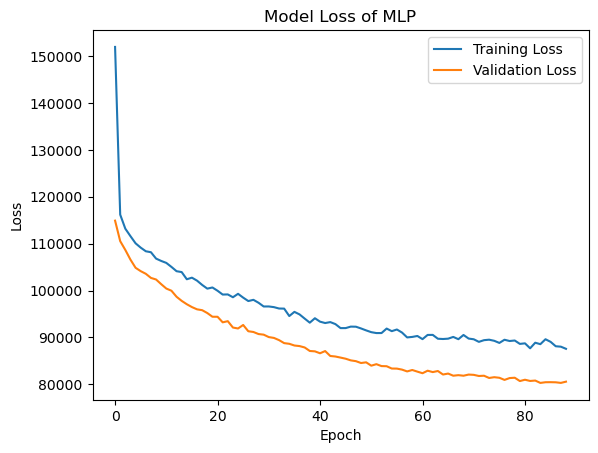

In [13]:
# Assuming history is the output of the model.fit() method
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss of MLP')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [14]:
y_pred = model.predict(X_test).flatten()  # Flatten predictions to ensure it's a 1D array
y_test_flattened = y_test.flatten()  # Flatten actual values for consistency

233/233 [==============================] - 0s 773us/step


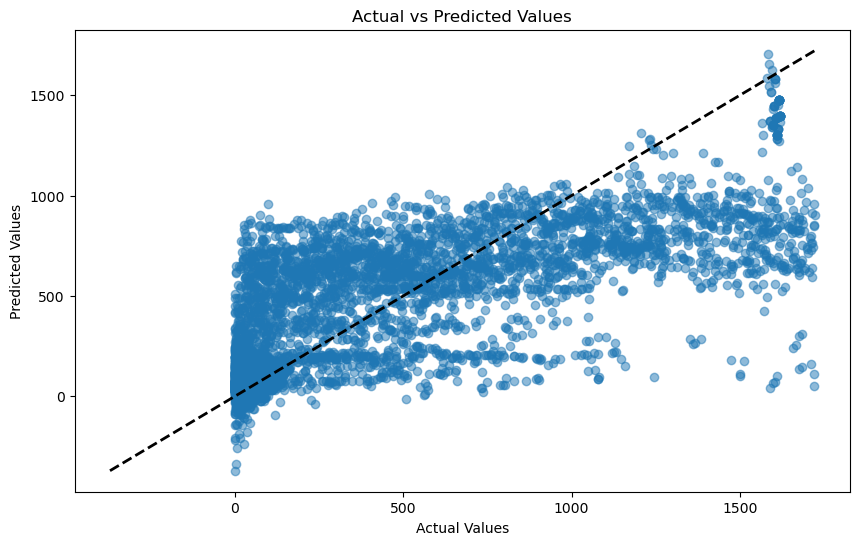

In [15]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_flattened, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Plot a line of perfect predictions for reference
max_val = max(y_test_flattened.max(), y_pred.max())
min_val = min(y_test_flattened.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)  # Black dashed line for perfect predictions

plt.show()

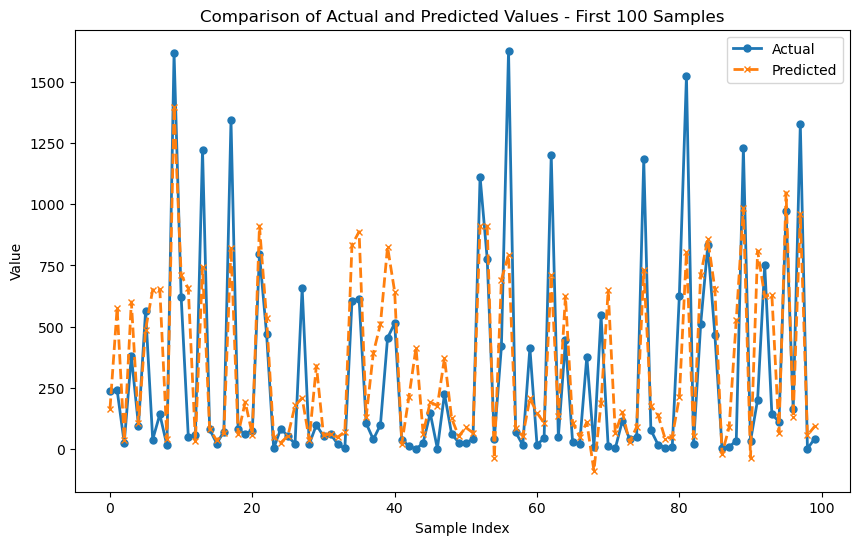

In [16]:
# Plotting a line plot for a clearer comparison for a subset
plt.figure(figsize=(10, 6))
plt.plot(y_test_flattened[:100], marker='o', label='Actual', linewidth=2, markersize=5)
plt.plot(y_pred[:100], marker='x', linestyle='--', label='Predicted', linewidth=2, markersize=5)
plt.title('Comparison of Actual and Predicted Values - First 100 Samples')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

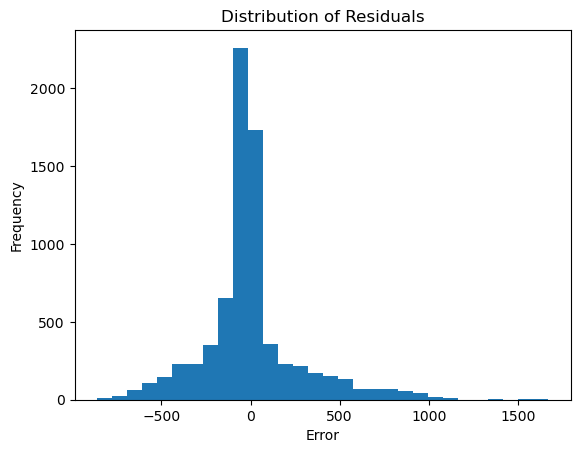

In [17]:
# Calculating residuals
residuals = y_test - y_pred.squeeze()  # Adjust dimensions if necessary

# Plotting the histogram of residuals
plt.hist(residuals, bins=30)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [18]:
# Evaluate the model
loss, mse, rmse, mae, mape = model.evaluate(X_test, y_test)
print("Test loss (MSE):", loss)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)

233/233 [==============================] - 0s 883us/step - loss: 78200.5312 - mse: 78189.6016 - rmse: 273.0469 - mae: 174.7747 - mape: 2700020480.0000
Test loss (MSE): 78200.53125
Mean Squared Error (MSE): 78189.6015625
Root Mean Squared Error (RMSE): 273.04693603515625
Mean Absolute Error (MAE): 174.7747039794922
Mean Absolute Percentage Error (MAPE): 2700020480.0
